NameError: name 'python' is not defined

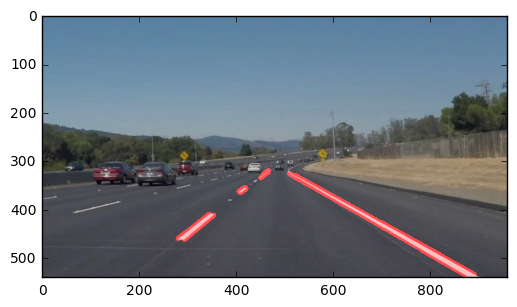

In [2]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML


# Importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
%matplotlib inline

# Reading an image
image = mpimg.imread('/Users/Reddy/Desktop/SDC ND/CarND-LaneLines-P1-master/test_images/solidWhiteCurve.jpg')


# Converting to grayscale
plt.imshow(image)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

# Applying Gaussian smoothing 

kernel_size = 3
g_blur = cv2.GaussianBlur(gray, (kernel_size, kernel_size),0)

# Applying Canny Transform

low_threshold = 50
high_threshold = 150
edges = cv2.Canny(g_blur, low_threshold, high_threshold)


# Creating a mask

mask = np.zeros_like(gray)

if len(gray.shape) > 2:
    channel_count = gray.shape[2]
    ignore_mask_color = (255,) * channel_count
else:
    ignore_mask_color = 255


# Defining a four sided polygon to mask
imshape = image.shape
vertices = np.array([[((150),imshape[0]),(470, 310),(imshape[1], (500)),(880,540),(imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
ρ = 1 # distance resolution in pixels of the Hough grid
θ = np.pi/180 # angular resolution in radians of the Hough grid
threshold = 11     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 8 #minimum number of pixels making up a line
max_line_gap = 1    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, ρ, θ, threshold, np.array([]),min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on a blank image
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

# Draw the lines on the edge image
lines_edges = cv2.addWeighted(image, 0.8, line_image, 1, 0) 
plt.imshow(lines_edges)

image_with_overlay = cv2.addWeighted(image, 0.8, line_image, 1, 0) 
mpimg.imsave('test_images/solidWhiteCurveLines', image_with_overlay)



def process_image(white_clip):
    # NOTE: The output you return should be a color image (3 channel) for processing video below
    # TODO: put your pipeline here,
    # you should return the final output (image with lines are drawn on lanes)
    white_output = '1.mp4'
    clip1 = VideoFileClip("/Users/Reddy/Desktop/SDC ND/CarND-LaneLines-P1-master/solidWhiteRight.mp4")
    white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
    %time white_clip.write_videofile(white_output, audio=False)
    return result



NameError: name 'python' is not defined